In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st 
import altair as alt
from PIL import Image

In [21]:
st.header("Vehicle Ads Analysis")
st.write("The dataset contains information about various vehicles, including their make, model, year, price, and other features.")  
st.checkbox("Show DataFrame", value=True, key="show_df")

True

In [22]:
#Import and read the dataset 
vechicle_ads = pd.read_csv('vehicles_us.csv', sep=',')

In [ ]:
#Print some information about the dataset
vechicle_ads.info()
vechicle_ads.describe()
vechicle_ads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500.0,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500.0,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500.0,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900.0,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [59]:
#Check for missing values and duplicates
duplicates = vechicle_ads.duplicated().sum()
missing_values = vechicle_ads.isnull().sum()
count_missing = vechicle_ads.isnull().sum().sum()
print(f"Number of duplicates: {duplicates}")
print(f"Number of missing values: {missing_values}")
print(f"Total count of missing values: {count_missing}")

Number of duplicates: 0
Number of missing values: price               0
model_year       3619
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64
Total count of missing values: 46731


In [47]:
#Remove duplicates
vechicle_ads.drop_duplicates(subset=None, keep='first', inplace=True)
#Remove null values
vechicle_ads.dropna(subset=['price'], inplace=True)
#Remove outliers
vechicle_ads = vechicle_ads[vechicle_ads['price'] < 1000000]

#Convert columns to appropriate data types
vechicle_ads['model_year'] = pd.to_numeric(vechicle_ads['model_year'], errors='coerce').astype('Int64')
vechicle_ads['price'] = vechicle_ads['price'].astype(float)
vechicle_ads['model'] = vechicle_ads['model'].astype(str)
vechicle_ads['condition'] = vechicle_ads['condition'].astype(str)
vechicle_ads['cylinders'] = vechicle_ads['cylinders'].astype(str)

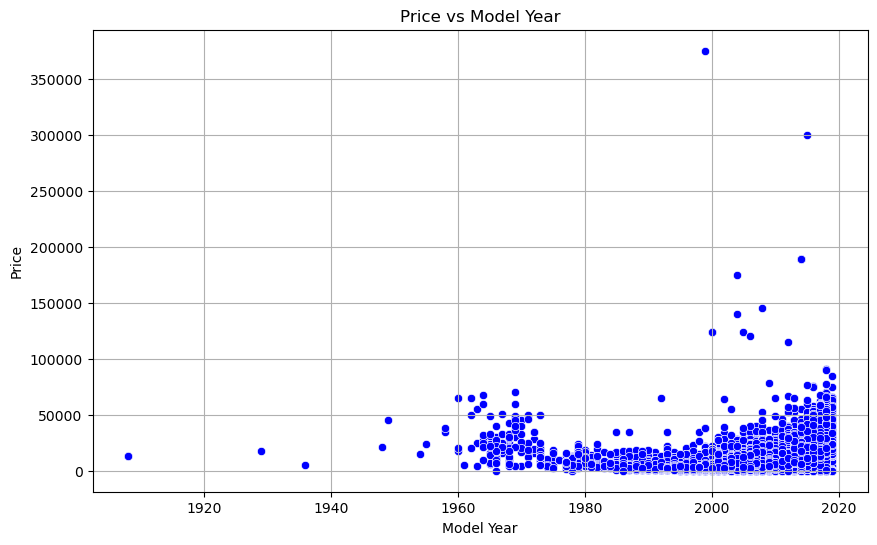

In [49]:
# Comparing the model year and price with a scatter plot
st.subheader("Scatter Plot of Model Year vs Price")
plt.figure(figsize=(10,6))
sns.scatterplot(x='model_year', y='price', data=vechicle_ads, color='blue')
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


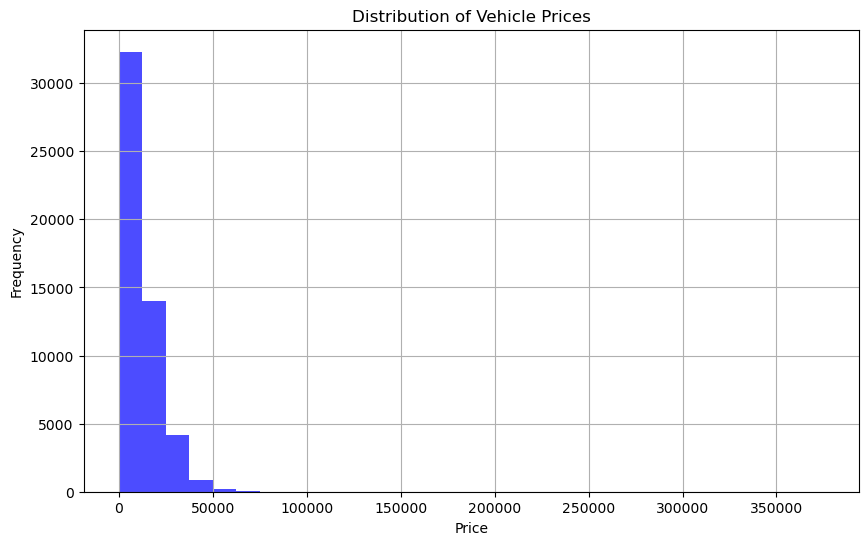

In [54]:
#create a histogram of the price
plt.figure(figsize=(10,6))
plt.hist(vechicle_ads['price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
